# IEooc Methods_3 Software_003 - Sample Solution

## Materials in the vehicle fleet in Freiburg

Next to the use phase-related GHG emissions, the life cycle of vehicles contains large emissions and raw material input from the materials that are used to manufacture the vehicles. In this exercise, we estimate the material content of the entire fleet (current in-use stock is the future recycling potential), the material demand for new vehicles, the material outflow for recycling, and the related material and GHG footprints.

**This calculation exercise covers calculations on the material stocks and flows, the recycling potential, and of the material supply steps of the energy service cascade for passenger vehicles in Freiburg.
It is a follow-up to Software workbooks IEooc Methods_3 Software_001 and IEooc Methods_3 Software_002.**

The data workbook *IEooc_Methods3_Software001_Data.xlsx* contains a number of parameters for the calculation.

The core of the fleet model is a description of the future vehicle fleet (or stock) *S* by year *t* and age-cohort (or year of registration) *c*: *S(t,c)*. For the purpose of this exercise, the age-cohort structure of the stock and its total future size is given as input data. The stock grows from about 95000 vehicles in 2022 to about 108000 in 2035, about 113000 in 2050, and about 11600 in 2060. This increase reflects the expected future population growth.

**Using the material from IEooc Methods_3 Software_001 and 002 (data and code), calculate and interpret the following indicators/quantities:**

### Task 1: For the given scenario, what are the time series for the inflow of new vehicles into the stock, and the outflow of old vehicles from the stock, and the stock (fleet size) itself?
Calculate the relevant indicators using the Python code below and interpret your results!
Split the stock into electric and gasoline vehicles as before.
Determine first the time series for inflow, outflow, and fleet size from the given data.

In [1]:
# First, import required libraries:
import pandas as pd   # dataframe library, used for fast import/export from/to excel and for organizing the data.
import numpy as np    # math library
import matplotlib.pyplot as plt  # plotting library

In [2]:
# read input data from excel into dataframe and convert to numpy array
df_fleet = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Fleet', index_col=0)
fleet = df_fleet.values
print(df_fleet.shape) # rows: 41 years 2020...2060, columns: 59 age-cohorts 2002...2060

(41, 59)


We first split the fleet into the two drive technologies as before:

In [3]:
df_Share = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='BEV_share', index_col=0)
SHARE_T = df_Share.values/100 # covert from % to 1.

fleet_cT = np.einsum('tc,cT->tcT',fleet,SHARE_T)

The fleet size is determined from the stock by age-cohort table, by summing up over the age-cohorts.

In [4]:
fleet_T = np.einsum('tcT->tT',fleet_cT)
fleet_T

array([[ 90011.89,    375.11],
       [ 92181.78,    623.22],
       [ 94029.76,    932.24],
       [ 95313.12,   1559.88],
       [ 96057.61,   2499.39],
       [ 96288.45,   3749.55],
       [ 96018.33,   5306.67],
       [ 95280.79,   7167.21],
       [ 94100.59,   9325.41],
       [ 92499.03,  11773.97],
       [ 90502.89,  14505.11],
       [ 88147.32,  17509.68],
       [ 85448.32,  20776.68],
       [ 82435.43,  24296.57],
       [ 79135.19,  28057.81],
       [ 75574.47,  32046.53],
       [ 71762.68,  36250.32],
       [ 67732.77,  40657.23],
       [ 63500.26,  45252.74],
       [ 59081.63,  50021.37],
       [ 54500.47,  54950.53],
       [ 49766.78,  60025.22],
       [ 45242.3 ,  64889.7 ],
       [ 40929.01,  69541.99],
       [ 36838.72,  73967.28],
       [ 32982.72,  78156.28],
       [ 29366.72,  82106.28],
       [ 25999.21,  85805.79],
       [ 22881.17,  89257.83],
       [ 20008.5 ,  92460.5 ],
       [ 17382.83,  95414.17],
       [ 14998.95,  98123.05],
       [

The above array shows the time series of the vehicles in the fleet, for gasoline vehicles (left column) and battery electric vehicles (right column).

The inflow is given as the start of each age-cohort, which is given on the diagonal of the stock table, as can be seen in the data excel file.
To extract it, the code provided in the software workbook is used:

In [5]:
Inflow_T = np.zeros((41,2))
for t in range(0,41):
    Inflow_T[t,:] = fleet_cT[t,t+18,:]
print(Inflow_T.shape)
Inflow_T

(41, 2)


array([[6180.84,  191.16],
       [6141.12,  255.88],
       [6101.85,  321.15],
       [5805.9 ,  645.1 ],
       [5506.3 ,  971.7 ],
       [5204.  , 1301.  ],
       [4896.75, 1632.25],
       [4585.7 , 1965.3 ],
       [4271.15, 2299.85],
       [3953.4 , 2635.6 ],
       [3632.75, 2972.25],
       [3310.5 , 3310.5 ],
       [2986.65, 3650.35],
       [2661.6 , 3992.4 ],
       [2334.85, 4336.15],
       [2007.  , 4683.  ],
       [1677.5 , 5032.5 ],
       [1346.  , 5384.  ],
       [1012.65, 5738.35],
       [ 677.3 , 6095.7 ],
       [ 339.75, 6455.25],
       [   0.  , 6816.  ],
       [   0.  , 6837.  ],
       [   0.  , 6858.  ],
       [   0.  , 6878.  ],
       [   0.  , 6898.  ],
       [   0.  , 6917.  ],
       [   0.  , 6936.  ],
       [   0.  , 6955.  ],
       [   0.  , 6974.  ],
       [   0.  , 6994.  ],
       [   0.  , 7013.  ],
       [   0.  , 7033.  ],
       [   0.  , 7052.  ],
       [   0.  , 7073.  ],
       [   0.  , 7093.  ],
       [   0.  , 7113.  ],
 

In [6]:
StockChange_cT = np.diff(fleet_cT,axis=0) # subtract stock from last year from stock in current year.
StockChange_T  = np.einsum('tcT->tT',StockChange_cT) # sum up over all age-cohorts
StockChange_T.shape

Outflow_T = Inflow_T[1::,:] - StockChange_T # vehicle inflow-outflow balance can be established from 2021 onwards.
Outflow_T

array([[3971.23,    7.77],
       [4253.87,   12.13],
       [4522.54,   17.46],
       [4761.81,   32.19],
       [4973.16,   50.84],
       [5166.87,   75.13],
       [5323.24,  104.76],
       [5451.35,  141.65],
       [5554.96,  187.04],
       [5628.89,  241.11],
       [5666.07,  305.93],
       [5685.65,  383.35],
       [5674.49,  472.51],
       [5635.09,  574.91],
       [5567.72,  694.28],
       [5489.29,  828.71],
       [5375.91,  977.09],
       [5245.16, 1142.84],
       [5095.93, 1327.07],
       [4920.91, 1526.09],
       [4733.69, 1741.31],
       [4524.48, 1972.52],
       [4313.29, 2205.71],
       [4090.29, 2452.71],
       [3856.  , 2709.  ],
       [3616.  , 2967.  ],
       [3367.51, 3236.49],
       [3118.04, 3502.96],
       [2872.67, 3771.33],
       [2625.67, 4040.33],
       [2383.88, 4304.12],
       [2147.77, 4556.23],
       [1919.95, 4804.05],
       [1704.91, 5040.09],
       [1497.32, 5263.68],
       [1308.19, 5477.81],
       [1132.21, 5671.79],
 

In this scenario, inflow, stock (fleet), and outflow rise steadily, and there is a shift from gasoline to electric vehicles.

For the inflow, the battery electric vehicle fraction becomes larger than the gasoline vehicle fraction in 2031 and the phase-out of gasoline vehicles is complete in 2041.
For the outflow, which follows the inflow with a delay of about 15 years (the vehicle lifetime), the transition happens later, with a break even in 2046 and a phase-out of gasoline vehicles from the outflow much later, since there are some long-live vehicles in the fleet.

### Task 2: For the given scenario, what are the time series of steel, aluminium, copper, and plastics in the vehicle fleet (stock), the materials in the inflow of new vehicles into the stock, and the materials in the outflow of old vehicles from the stock?
Calculate the relevant indicators using the Python code below and interpret your results!
Split the stock into electric and gasoline vehicles as before.
Determine first inflow, outflow, and fleet size from the given data (see task 1) and then multiply them with the given data on vehicle material composition for the different drive technologies!

Plot the data in different plots: one for the stock, and two for inflwo and outflow of materials, or a combined one with inflow and outflow data.

Here, the material composition data have the dimensions material *m* by drive technology *T*, and to keep things simple, they apply to all age-cohorts (years of production).
The calculations are as follows, with MC(mT) indicating the material composition of the vehicles:

$$ S(t,m) = \sum_{c,T} MC(m,T) \cdot S(t,c,T) $$

$$ I(t,m) = \sum_{T} MC(m,T) \cdot I(t,T) $$

$$ O(t,m) = \sum_{T} MC(m,T) \cdot O(t,T) $$


In [7]:
# We first load the material composition data and then multiply them to the time series:
df_mats = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Material_intensity', index_col=0)
mats = df_mats.values

In [8]:
Inflow_m = np.einsum('tT,mT->tm',Inflow_T,mats) / 1000 # convert units to tons
print(Inflow_m)
print('') # empty line

Outflow_m = np.einsum('tT,mT->tm',Outflow_T,mats) / 1000 # convert units to tons
print(Outflow_m)
print('') # empty line

Fleet_m = np.einsum('tT,mT->tm',fleet_T,mats) / 1000 # convert units to tons
print(Fleet_m)


[[5.62067925e+03 7.38350686e+02 1.37451044e+02 3.16553919e+02
  1.60460813e+02 6.35863928e-01 1.34999985e+03 9.27126000e+01
  1.52928000e+00 2.67624000e+00]
 [5.64273151e+03 7.41247543e+02 1.37990321e+02 3.17795891e+02
  1.63883314e+02 6.38358686e-01 1.35529646e+03 9.21168000e+01
  2.04704000e+00 3.58232000e+00]
 [5.66566585e+03 7.44260273e+02 1.38551170e+02 3.19087542e+02
  1.67353701e+02 6.40953234e-01 1.36080494e+03 9.15277500e+01
  2.56920000e+00 4.49610000e+00]
 [5.69036438e+03 7.47504752e+02 1.39155160e+02 3.20478551e+02
  1.82165870e+02 6.43747363e-01 1.36673714e+03 8.70885000e+01
  5.16080000e+00 9.03140000e+00]
 [5.71418082e+03 7.50633356e+02 1.39737580e+02 3.21819882e+02
  1.97069867e+02 6.46441702e-01 1.37245748e+03 8.25945000e+01
  7.77360000e+00 1.36038000e+01]
 [5.73799726e+03 7.53761961e+02 1.40320000e+02 3.23161212e+02
  2.12091746e+02 6.49136041e-01 1.37817781e+03 7.80600000e+01
  1.04080000e+01 1.82140000e+01]
 [5.75916742e+03 7.56542943e+02 1.40837706e+02 3.24353505e

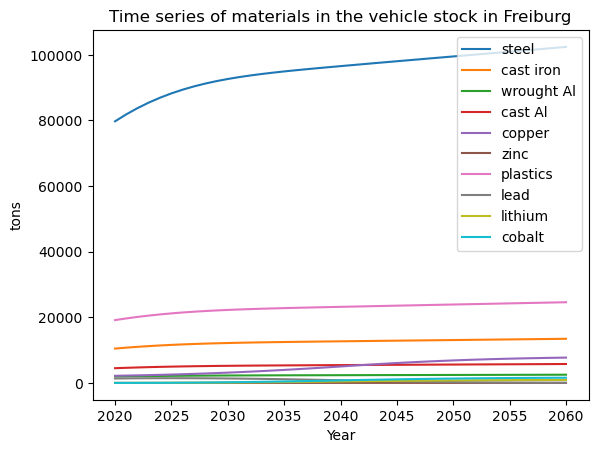

In [9]:
plt.plot(np.arange(2020,2061,1),Fleet_m) # plot with given x-axis values, generated with the np.arange command
plt.title('Time series of materials in the vehicle stock in Freiburg')
plt.ylabel('tons')
plt.xlabel('Year')
plt.legend(['steel','cast iron','wrought Al','cast Al','copper','zinc','plastics','lead','lithium','cobalt'])
plt.savefig('Materials_Fleet.png', dpi = 300) # save figure with the modifications made above.

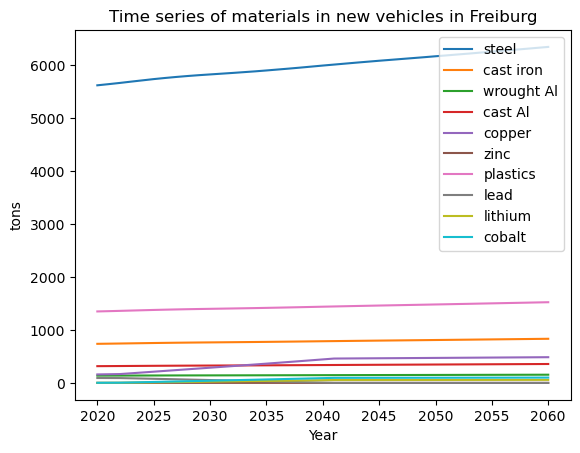

In [10]:
plt.plot(np.arange(2020,2061,1),Inflow_m) # plot with given x-axis values, generated with the np.arange command
plt.title('Time series of materials in new vehicles in Freiburg')
plt.ylabel('tons')
plt.xlabel('Year')
plt.legend(['steel','cast iron','wrought Al','cast Al','copper','zinc','plastics','lead','lithium','cobalt'])
plt.savefig('Materials_Inflow.png', dpi = 300) # save figure with the modifications made above.

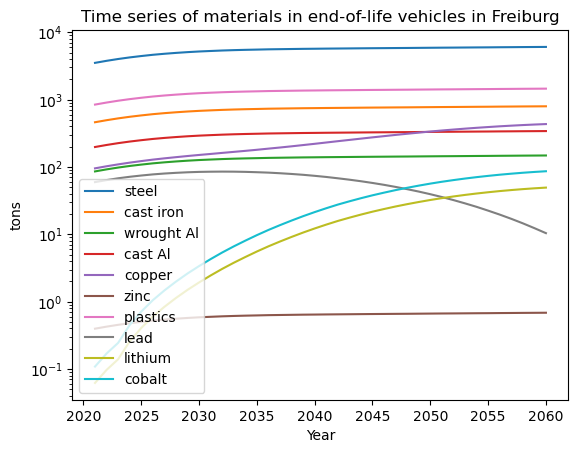

In [11]:
plt.plot(np.arange(2021,2061,1),Outflow_m) # plot with given x-axis values (starting in 2021!), generated with the np.arange command
plt.title('Time series of materials in end-of-life vehicles in Freiburg')
plt.ylabel('tons')
plt.xlabel('Year')
plt.yscale('log') # use log scale for y axis to compare the very different orders of magnitude
plt.legend(['steel','cast iron','wrought Al','cast Al','copper','zinc','plastics','lead','lithium','cobalt'])
plt.savefig('Materials_Outflow.png', dpi = 300) # save figure with the modifications made above.

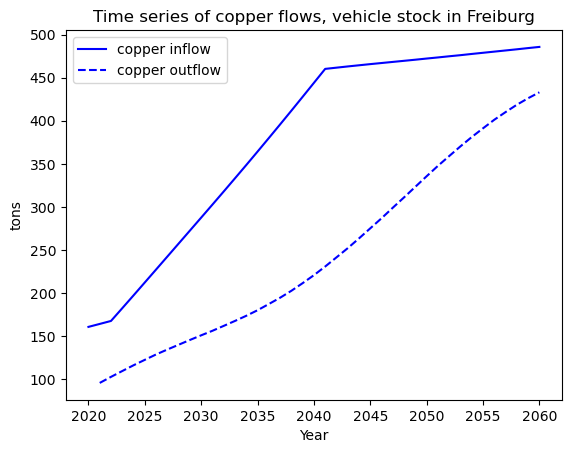

In [12]:
# Alternative: Combine inflow and outflow, here for copper only, which has an interesting development:
plt.plot(np.arange(2020,2061,1),Inflow_m[:,4],  linestyle = '-',  color = 'b') # plot with given x-axis values, generated with the np.arange command
plt.plot(np.arange(2021,2061,1),Outflow_m[:,4], linestyle = '--', color = 'b')
plt.title('Time series of copper flows, vehicle stock in Freiburg')
plt.ylabel('tons')
plt.xlabel('Year')
plt.legend(['copper inflow','copper outflow'])
plt.savefig('Copper_Fleet.png', dpi = 300) # save figure with the modifications made above.

The material stocks and flows of steel are the largest by far, since steel is the main material of vehicles.
All flows steadily increase due to the increasing population.

The flows are roughly 15 times smaller than the stock, which reflects the average vehicle lifetime and the moderate increase of the fleet.

Due to the transition to BEVs modelled in the scenario, the annual inflow of copper in new vehicles will roughly triple over the  coming years, from presently about 150 tons to around 500 tons per year.

As a consequence, the outflow of copper will increase, too, with a delay of about 15 years, the average vehicle lifetime.
The curve of copper outflow is smoother than the inflow curve. This is because for the inflow, abrupt changes in the BEV vehicle uptake were assumed, while the vehicle lifetime is not exactly 15 years but follows a distribution, with some vehicles leaving earlier and some later than 15 years, which lead to a smooth outflow curve.

### Task 3: With the given end-of-life recycling rates (Excel data workbook), how much of the material for the new vehicles could be sourced from old vehicles? How large would the 'recycled content' be in that case?

Calculate and interpret the result!

We calculate the available secondary (recycled) material, *SecMat(t,m)*, by multiplying the end-of-life recovery rate by material, *EoL_RR(m)*, to the outflow:

$$ SecMat(t,m) = EoL\_RR(m) \cdot O(t,m) $$


In [13]:
# We first load the recycling data and then multiply them to the time series:
df_EoL_RR = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Recovery_rates', index_col=0)
EoL_RR = df_EoL_RR.values / 100 # convert to %

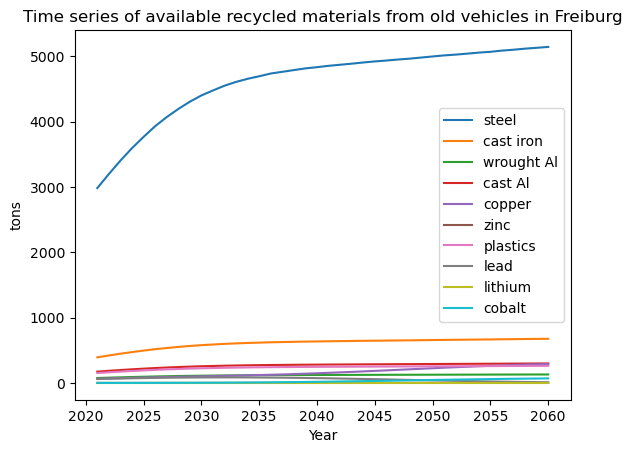

In [14]:
SecMat = np.einsum('m,tm->tm',EoL_RR[:,0],Outflow_m)
# Note: EoL_RR comes with two scenarios. Here, we take the first one (current situation).

plt.plot(np.arange(2021,2061,1),SecMat) 
plt.title('Time series of available recycled materials from old vehicles in Freiburg')
plt.ylabel('tons')
plt.xlabel('Year')
plt.legend(['steel','cast iron','wrought Al','cast Al','copper','zinc','plastics','lead','lithium','cobalt'])
plt.savefig('Materials_Recycling.png', dpi = 300) # save figure with the modifications made above.

To derive the recycled content, we assume a scenario where all secondary material sourced from end-of-life vehicles is recycled back into new materials. In such a situtation, the recycled content *RC(t,m)*, or the share of secondary in total material consumption, is given by the ratio of recycled material and total material:

$$ RC(t,m) = SecMat(t,m) / I(t,m) $$

c:\ProgramData\Anaconda3\envs\environment\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


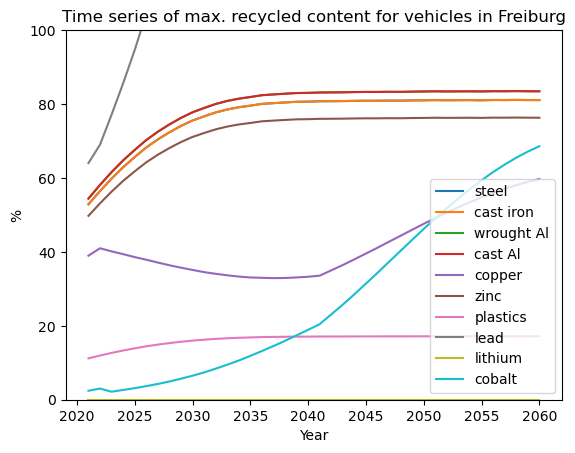

In [15]:
RC = SecMat / Inflow_m[1::,:] * 100
# Note: EoL_RR comes with two scenarios. Here, we take the first one (current situation).
# Note: Since we have the recycling flows only from 2021 onwards, we need to slice the inflow to also start in 2021.
# Note: Unit converted to %.

# The recycled content cannot be larger than 100%. If more secondary material is present, the excess material is exported to other sectors instead.

plt.plot(np.arange(2021,2061,1),RC) 
plt.title('Time series of max. recycled content for vehicles in Freiburg')
plt.ylabel('%')
plt.xlabel('Year')
plt.gca().set_ylim(bottom=0) # set lower y boundary to 0
plt.gca().set_ylim(top=100) # set upper y boundary to 100, no higher recycled content is possible.
plt.legend(['steel','cast iron','wrought Al','cast Al','copper','zinc','plastics','lead','lithium','cobalt'])
plt.savefig('Materials_Recycled_Content.png', dpi = 300) # save figure with the modifications made above.

In the standard recycling scenario, the recycled content can be quite high, despite the imperfect recycling (recovery and remelting losses) and the growing stock. Up to 75...80% of recycled content are possible for steel, cast iron (same curve as steel), aluminium, and zinc. For plastics, the current recycling rates are low, as most plastics ends up in so-called automotive shredder residue and is incinerated. For copper, the maximal recycled content drops first, due to the massive growth of the stock as a consequence of the roll-out of battery electric vehicles, and increases later, as the first BEVs leave the stock.

For the specialty metal lead, the recycled content is very high already and soon, with the phase-out of internal combustion engine vehicles, there will be more lead supply in scrap from old cars than there is demand for lead in new cars. Since car batteries are the largest use of lead, there will likely be stockpiles of unused lead in the future.

With current recycling technologies, cobalt recycled content can increase to 50% around 2050, when there will be a steady supply of end-of-life BEVs.

### Task 4: Formulate a more ambitious recycling scenario for scrap recovery and recycling from vehicles! How does the recycled content change in that case? How plausible and feasible are your results?

Calculate and plot the result!

Same calculations as above, but the advanced recycling values are taken (column 1 instead of 0 in the EoL_RR parameter).

c:\ProgramData\Anaconda3\envs\environment\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


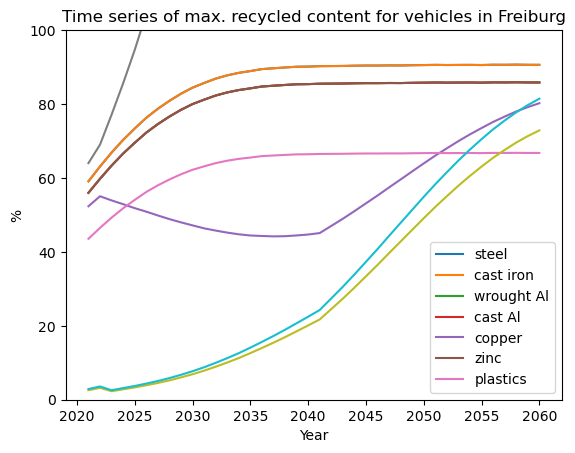

In [16]:
SecMat_2 = np.einsum('m,tm->tm',EoL_RR[:,1],Outflow_m)
# Note: EoL_RR comes with two scenarios. Here, we take the second one (improved situation).

RC_2 = SecMat_2 / Inflow_m[1::,:] * 100
# Note: EoL_RR comes with two scenarios. Here, we take the first one (current situation).
# Note: Since we have the recycling flows only from 2021 onwards, we need to slice the inflow to also start in 2021.
# Note: Unit converted to %.

plt.plot(np.arange(2021,2061,1),RC_2) 
plt.title('Time series of max. recycled content for vehicles in Freiburg')
plt.ylabel('%')
plt.xlabel('Year')
plt.gca().set_ylim(bottom=0) # set lower y boundary to 0
plt.gca().set_ylim(top=100) # set upper y boundary to 100, no higher recycled content is possible.
plt.legend(['steel','cast iron','wrought Al','cast Al','copper','zinc','plastics'])
plt.savefig('Materials_Recycled_Content_2.png', dpi = 300) # save figure with the modifications made above.

As a consequence of the improved recycling rates (end-of-life recovery rates), the maximal recycled content is higher in this scenario. The values can be justified as follows:
- Steel and cast iron: large parts (body in white), can easily be recoverd and recycled
- Aluminium parts: smaller parts, higher remelting losses, maximum value a bit smaller than for steel
- Zinc: mostly used to cover steel for corrosion protection, improvements thus coupled to improvements for steel
- Copper: High value but dispersed use (cables, printed circuit boards)
- Plastics: Industry information that up to 70% recycled content are possible, rest must be primary plastics to keep quality high.
- Lead: the recycled content is very high already and soon, with the phase-out of internal combustion engine vehicles, there will be more lead supply in scrap from old cars than there is demand for lead in new cars. Since car batteries are the largest use of lead, there will likely be stockpiles of unused lead in the future.
- Lithium and Cobalt: With future recycling technologies, lithium and cobalt recycled content can increase to 70% after 2050, when there will be a steady supply of end-of-life BEVs.

### Task 5: What are the GHG and raw material use (natural resource use) implications of the different recycling scenarios?

Calculate and plot the result!

We first read the impact data, which are given per material (primary or secondary), *ImpPrimMat(m,I)* and *ImpSecMat(m,I)*, and which come with an impact dimension *I*.

We first calculate the primary production *PrimMat* as the material that is supplied from primary recources:

$$ PrimMat(t,m) = I(t,m) - SecMat(t,m)$$

We then calcualate the impacts, *Imp(I,t)*, by summing up the impacts from primary and secondary production:

$$ Imp(t,I) = \sum_{m} ImpPrimMat(m,I) \cdot PrimMat(t,m) + \sum_{m} ImpSecMat(m,I) \cdot SecMat(t,m) $$

The calculations above are repeated for both scenarios.

In [17]:
# We first load the footprint data and then multiply them to the time series of material production:
df_ImpPrimMat = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Env_impacts_primary_materials', index_col=0)
ImpPrimMat = df_ImpPrimMat.values

df_ImpSecMat = pd.read_excel('IEooc_Methods3_Software001_Data.xlsx', sheet_name='Env_impacts_secondary_materials', index_col=0)
ImpSecMat = df_ImpSecMat.values

In [18]:
PrimMat_1 = Inflow_m[1::,:] - SecMat
PrimMat_2 = Inflow_m[1::,:] - SecMat_2

In [19]:
Imp_1 = np.einsum('mI,tm->tI',ImpPrimMat,PrimMat_1) + np.einsum('mI,tm->tI',ImpSecMat,SecMat)
Imp_2 = np.einsum('mI,tm->tI',ImpPrimMat,PrimMat_2) + np.einsum('mI,tm->tI',ImpSecMat,SecMat_2)
Imp_1.shape

(40, 4)

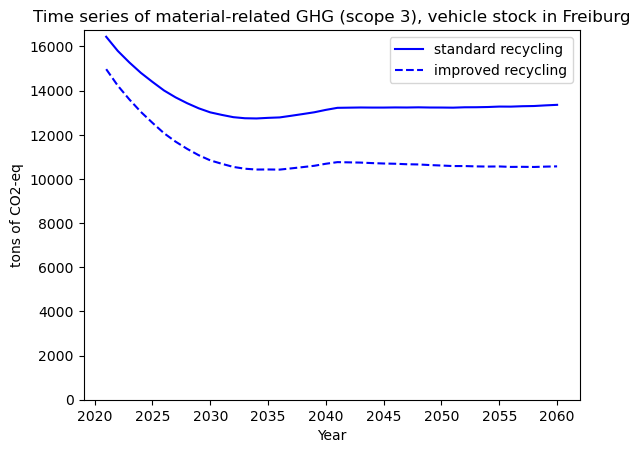

In [20]:
# Plot GHG impact of both scenarios:
plt.plot(np.arange(2021,2061,1),Imp_1[:,0], linestyle = '-',  color = 'b') # plot with given x-axis values, generated with the np.arange command
plt.plot(np.arange(2021,2061,1),Imp_2[:,0], linestyle = '--', color = 'b')
plt.title('Time series of material-related GHG (scope 3), vehicle stock in Freiburg')
plt.ylabel('tons of CO2-eq')
plt.xlabel('Year')
plt.gca().set_ylim(bottom=0) # set lower y boundary to 0
plt.legend(['standard recycling','improved recycling'])
plt.savefig('GHG_Materials.png', dpi = 300) # save figure with the modifications made above.

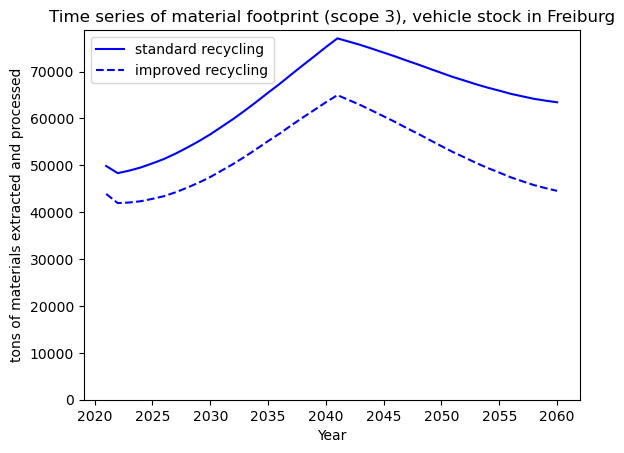

In [21]:
# Plot material footprint of both scenarios:
plt.plot(np.arange(2021,2061,1),Imp_1[:,1], linestyle = '-',  color = 'b') # plot with given x-axis values, generated with the np.arange command
plt.plot(np.arange(2021,2061,1),Imp_2[:,1], linestyle = '--', color = 'b')
plt.title('Time series of material footprint (scope 3), vehicle stock in Freiburg')
plt.ylabel('tons of materials extracted and processed')
plt.xlabel('Year')
plt.gca().set_ylim(bottom=0) # set lower y boundary to 0
plt.legend(['standard recycling','improved recycling'])
plt.savefig('Material_Footprint.png', dpi = 300) # save figure with the modifications made above.

The scope 3 GHG settle at around 14000 tons of CO2-eq per year, and decrease down to around 11000 tons of CO2-eq per year. This decline of about 25% despite the moderate improvement in recycling rates (except for plastics) illustrates the high savings potential of sourcing materials from scrap instead of primary resources. 

The GHG plot also shows that with the current fleet of gasoline vehicles, scope 3 emissions are small compared to scope 1 emissions. For a fleet of electric vehicles with a low carbon electricity mix, however, the scope 3 emissions from material production become a major contributor to the fleet's life cycle emissions, which again highlights the importance of vehicle lightweighting and better recycling.

The material footprint of the fleet increases first, which can be attributed to the increased use of copper, wich has a material footprint of about 170 kg when sources from copper ore (i.e., ca. 170 kg of copper ore have to be extracted and processed to produce 1 kg of copper).
Only once copper becomes available for recycling from old electric vehicles, after 2040, the recycled content of copper increases, and the material footprint of the vehicle fleet decreases.